<a href="https://colab.research.google.com/github/Kushagraraghav/AI-ML/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the imbalanced-learn library if not already installed
!pip install -U imbalanced-learn

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [12]:
# Generate imbalanced dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=8, n_redundant=2,
    weights=[0.9, 0.1], random_state=42
)

In [13]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = y

In [14]:
# Display class distribution
print("Original Class Distribution:")
print(df['Target'].value_counts())


Original Class Distribution:
Target
0    897
1    103
Name: count, dtype: int64


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Function to train and evaluate a model
def train_evaluate_model(X_train, y_train, X_test, y_test, description):
    print(f"\n{description}")
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='viridis')
    plt.title(description)
    plt.show()


Without Handling Imbalance
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       266
           1       0.75      0.26      0.39        34

    accuracy                           0.91       300
   macro avg       0.83      0.63      0.67       300
weighted avg       0.89      0.91      0.89       300



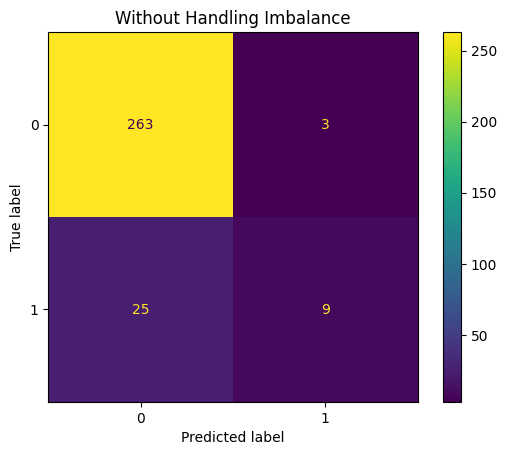

In [7]:
# 1. Without handling imbalance
train_evaluate_model(X_train, y_train, X_test, y_test, "Without Handling Imbalance")



Class Distribution After SMOTE Oversampling:
0    631
1    631
Name: count, dtype: int64

With SMOTE Oversampling
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       266
           1       0.63      0.56      0.59        34

    accuracy                           0.91       300
   macro avg       0.79      0.76      0.77       300
weighted avg       0.91      0.91      0.91       300



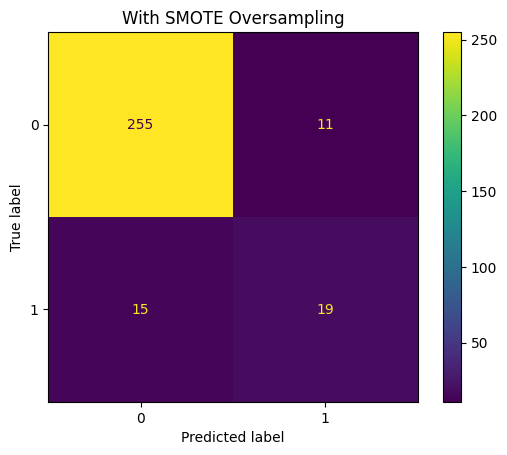

In [8]:
# 2. Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
print("\nClass Distribution After SMOTE Oversampling:")
print(pd.Series(y_resampled_smote).value_counts())
train_evaluate_model(X_resampled_smote, y_resampled_smote, X_test, y_test, "With SMOTE Oversampling")


Class Distribution After Random Undersampling:
0    69
1    69
Name: count, dtype: int64

With Random Undersampling
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       266
           1       0.31      0.79      0.45        34

    accuracy                           0.78       300
   macro avg       0.64      0.78      0.65       300
weighted avg       0.89      0.78      0.81       300



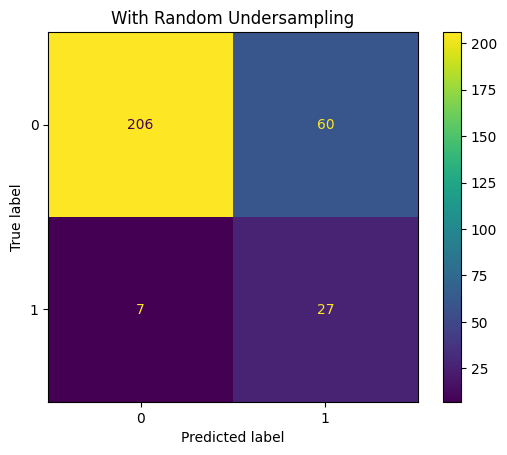

In [9]:

# 3. Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, y_train)
print("\nClass Distribution After Random Undersampling:")
print(pd.Series(y_resampled_under).value_counts())
train_evaluate_model(X_resampled_under, y_resampled_under, X_test, y_test, "With Random Undersampling")


Class Distribution After SMOTEENN Combination:
1    620
0    567
Name: count, dtype: int64

With SMOTEENN Combination
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.62      0.68      0.65        34

    accuracy                           0.92       300
   macro avg       0.79      0.81      0.80       300
weighted avg       0.92      0.92      0.92       300



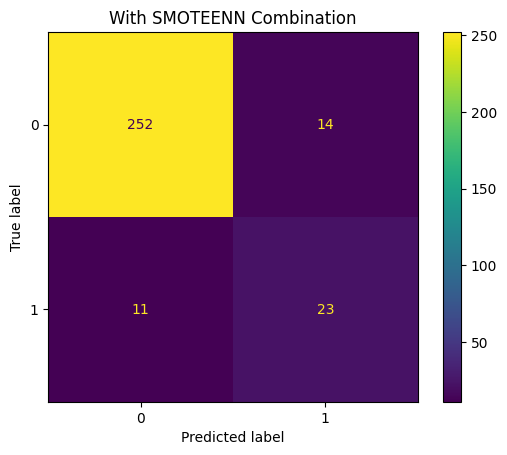

In [10]:
# 4. Combination of Oversampling and Undersampling (SMOTEENN)
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X_train, y_train)
print("\nClass Distribution After SMOTEENN Combination:")
print(pd.Series(y_resampled_smoteenn).value_counts())
train_evaluate_model(X_resampled_smoteenn, y_resampled_smoteenn, X_test, y_test, "With SMOTEENN Combination")